# 1. 단항 논리회귀(Logistic Regression) 실습
* 분류를 할 때 사용하며, 선형 회귀 공식으로부터 나왔기 때문에 논리회귀라는 이름이 붙여짐
* 직선 하나(선형 회귀)를 사용해서 분류를 예측한다면 제대로 예측하지 못할 경우가 많음

<center><img src='https://i.imgur.com/nE29yVL.png' width=600></center>


<center><img src='https://i.imgur.com/guvMfkf.png' width=600></center>
* Sigmoid 함수(Logistic 함수)를 사용하여 분류의 정확도를 높일 수 있음

# 2. 시그모이드(Sigmoid) 함수
* 예측값을 0에서 1사이의 값으로 되도록 만듦
* 0에서 1사이의 연속된 값을 출력으로 하기 때문에 보통 0.5(임계값)를 기준으로 구분

In [42]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [43]:
torch.manual_seed(2024)

In [44]:
x_train = torch.FloatTensor([[0], [1], [3], [5], [8], [11], [15], [20]])
y_train = torch.FloatTensor([[0], [0], [0], [0], [0], [1], [1], [1]])
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 1])
torch.Size([8, 1])


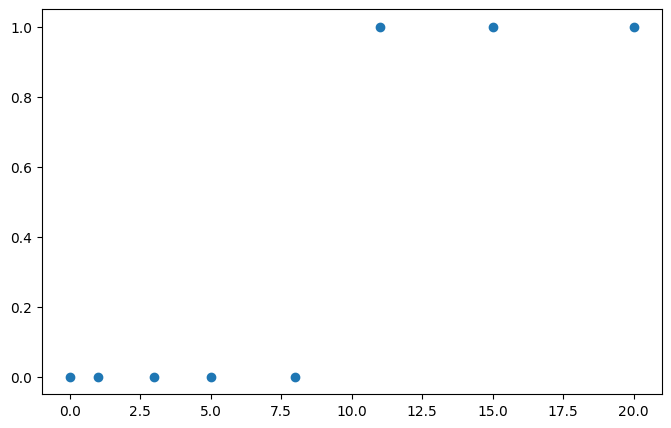

In [45]:
plt.figure(figsize=(8, 5))
plt.scatter(x_train, y_train)

![](https://i.imgur.com/6NsfKMa.png)

In [46]:
model = nn.Sequential(
    nn.Linear(1, 1),
    nn.Sigmoid()
)

print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): Sigmoid()
)


In [47]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.0634]], requires_grad=True), Parameter containing:
tensor([0.6625], requires_grad=True)]


# 3. 비용 함수
* 논리회귀에서는 nn.BCELoss() 함수를 사용하여 Loss를 계산
* Binary Cross Entropy

<img src='https://i.imgur.com/tvCuEmh.png' width='500'>

In [48]:
y_pred = model(x_train)
y_pred

tensor([[0.6598],
        [0.6739],
        [0.7012],
        [0.7270],
        [0.7631],
        [0.7958],
        [0.8340],
        [0.8734]], grad_fn=<SigmoidBackward0>)

In [49]:
loss = nn.BCELoss()(y_pred, y_train)
loss

tensor(0.8364, grad_fn=<BinaryCrossEntropyBackward0>)

In [50]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [51]:
epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.BCELoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/1000 Loss: 0.836359
Epoch: 100/1000 Loss: 0.725281
Epoch: 200/1000 Loss: 0.645149
Epoch: 300/1000 Loss: 0.579139
Epoch: 400/1000 Loss: 0.524739
Epoch: 500/1000 Loss: 0.479715
Epoch: 600/1000 Loss: 0.442194
Epoch: 700/1000 Loss: 0.410667
Epoch: 800/1000 Loss: 0.383936
Epoch: 900/1000 Loss: 0.361067
Epoch: 1000/1000 Loss: 0.341329


In [52]:
print(list(model.parameters()))

[Parameter containing:
tensor([[0.2019]], requires_grad=True), Parameter containing:
tensor([-1.4572], requires_grad=True)]


In [53]:
x_test = torch.FloatTensor([[12]])
y_pred = model(x_test)
print(y_pred)

tensor([[0.7243]], grad_fn=<SigmoidBackward0>)


In [54]:
# 임계치 설정하기
# 0.5보다 크거나 같으면 1
# 0.5보다 작으면 0
y_bool = (y_pred >= 0.5).float()
print(y_bool)

tensor([[1.]])


# 4. 다항 논리회귀 실습

In [55]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]

y_train = [0, 0, 0, 1, 1, 1, 2, 2]

In [56]:
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)
print(x_train.shape)
print(y_train.shape)

torch.Size([8, 4])
torch.Size([8])


In [57]:
model = nn.Sequential(
    nn.Linear(4, 3)
)

print(model)

Sequential(
  (0): Linear(in_features=4, out_features=3, bias=True)
)


In [58]:
y_pred = model(x_train)
print(y_pred)

tensor([[-0.3467,  0.0954, -0.5403],
        [-0.3109, -0.0908, -1.3992],
        [-0.1401,  0.1226, -1.3379],
        [-0.4850,  0.0565, -2.1343],
        [-4.1847,  1.6323, -0.7154],
        [-2.4318,  1.2809, -0.8234],
        [-4.2877,  1.7462, -0.8999],
        [-5.1520,  2.1004, -0.9593]], grad_fn=<AddmmBackward0>)


In [59]:
# 다항 논리회귀에서는 BCELoss() 대신 CrossEntropyLoss()를 사용
# 소프트맥스 함수가 포함되어 있음
loss = nn.CrossEntropyLoss()(y_pred, y_train)
print(loss)

tensor(1.2130, grad_fn=<NllLossBackward0>)


In [60]:
optimizer = optim.SGD(model.parameters(), lr = 0.1)

In [61]:
epochs = 1000
for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch: {epoch}/{epochs} Loss: {loss:.6f}')

Epoch: 0/1000 Loss: 1.212971
Epoch: 100/1000 Loss: 0.629261
Epoch: 200/1000 Loss: 0.556415
Epoch: 300/1000 Loss: 0.505015
Epoch: 400/1000 Loss: 0.462015
Epoch: 500/1000 Loss: 0.423341
Epoch: 600/1000 Loss: 0.386988
Epoch: 700/1000 Loss: 0.351581
Epoch: 800/1000 Loss: 0.316010
Epoch: 900/1000 Loss: 0.279698
Epoch: 1000/1000 Loss: 0.247014


In [62]:
x_test = torch.FloatTensor([[1, 7, 8, 7]])
y_pred = model(x_test)
print(y_pred)

tensor([[-10.2333,   0.3633,   5.1844]], grad_fn=<AddmmBackward0>)


In [63]:
# 예측값과 확률 구하기
y_prob = nn.Softmax(1)(y_pred)
y_prob

tensor([[1.9985e-07, 7.9936e-03, 9.9201e-01]], grad_fn=<SoftmaxBackward0>)

In [64]:
print(f'0일 확률: {y_prob[0][0]:.2f}')
print(f'1일 확률: {y_prob[0][1]:.2f}')
print(f'2일 확률: {y_prob[0][2]:.2f}')

0일 확률: 0.00
1일 확률: 0.01
2일 확률: 0.99


In [65]:
torch.argmax(y_prob, axis=1)

tensor([2])

# 5. 경사 하강법의 종류

### 5-1. 배치 경사 하강법
* 가장 기본적인 경사 하강법(Vanilla Gradient Descent)
* 데이터셋 전체를 고려하여 손실함수를 계산
* 한 번의 Epoch에 모든 파라미터 업데이트를 단 한번만 수행
* batch의 갯수와 Iteration은 1이고, Batch Size는 전체 데이터의 갯수
* 파라미터 업데이트할 때 한 번의 전체 데이터셋을 고려하기 때문에 모델 학습 시 많은 시간과 메모리가 필요하다는 단점이 있음

### 5-2. 확률적 경사 하강법
* 확률적 경사 하강법(Stochastic Gradient Descent)은 배치 경사 하강법이 모델 학습 시 많은 시간과 메모리가 필요하다는 단점을 개선하기 위해 제안된 기법
* Batch Size를 1로 설정하여 파라미터를 업데이트 하기 때문에 배치 경사 하강법보다 훨씬 빠르고 적은 메모리로 학습을 진행
* 파라미터 값의 업데이트 폭이 불안정하기 때문에 정확도가 낮은 경우가 생길 수 있음

### 5-3. 미니 배치 경사 하강법
* 미니 배치 경사 하강법(Mini-Batch Gradient Descent)은 Batch Size를 설정한 size로 사용
* 배치 경사 하강법보다 모델 학습 속도가 빠르고, 확률적 경사 하강법보다 안정적인 장점이 있음
* 딥러닝 분야에서 가장 많이 활용되는 경사 하강법
* 일반적으로 Batch Size를 16, 32, 64, 128과 같이 2의 n제곱에 해당하는 값으로 사용하는게 보편적

# 6. 경사 하강법의 여러가지 알고리즘

### 6-1. SGD(확률적 경사 하강법)
* 매개변수 값을 조정 시 전체 데이터가 아니라 랜덤으로 선택한 하나의 데이터에 대해서만 게산하는 방법

### 6-2. 모멘텀(Momentum)
* 관성이라는 물리학의 법칙을 응용한 방법
* 경사 하강법에 관성을 더 해줌
* 접선의 기울기에 한 시점 이전의 접선의 기울기값을 일정한 비율만큼 반영

### 6-3. 아다그라드(Adagrad)
* 모든 매개변수에 동일한 학습률(learning rate)을 적용하는 것은 비효율적이라는 생각에서 만들어진 학습 방법
* 처음에는 크게 학습하다가 조금씩 작게 학습시킴

### 6-4. 아담(Adam)
* 모멘텀 + 아다그라드

### 6-5. AdamW
* Adam optimizer의 변형
* Adam의 일부 약점(가중치 감쇠)과 성능 향상을 위해 고안

# 7. 와인 품종 예측해보기
* sklearn.datasets.load_wine: 이탈리아의 같은 지역에서 재배된 세가지 다른 품종으로 만든 와인을 화학적으로 분석한 결과에 대한 데이터셋
* 13개의 성분을 분석하여 어떤 와인인지 구별하는 딥러닝 모델을 구축
* 데이터를 섞은 후 train 데이터를 80%, test 데이터를 20%로 하여 사용
* Adam을 사용, 예) optim.Adam(model.parameters(), lr=0.01)
* test 데이터의 0번 인덱스가 어떤 와인인지, 정확도를 출력

In [66]:
from sklearn.datasets import load_wine

In [67]:
x_data , y_data = load_wine(return_X_y=True, as_frame=True)

In [68]:
x_data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [69]:
y_data

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [70]:
x_data = torch.FloatTensor(x_data.values)
y_data = torch.LongTensor(y_data.values)

print(x_data.shape)
print(y_data.shape)

torch.Size([178, 13])
torch.Size([178])


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=2024)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

torch.Size([142, 13]) torch.Size([142])
torch.Size([36, 13]) torch.Size([36])


In [73]:
model = nn.Sequential(
    nn.Linear(13, 3)
)

optimizer = optim.Adam(model.parameters(), lr=0.01)

epochs = 1000

for epoch in range(epochs + 1):
    y_pred = model(x_train)
    loss = nn.CrossEntropyLoss()(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        y_prob = nn.Softmax(1)(y_pred)
        y_pred_index = torch.argmax(y_prob, axis=1)
        y_train_index = y_train
        accuracy = (y_train_index == y_pred_index).float().sum() / len(y_train) * 100
        print(f'Epoch {epoch:4d}/{epoch} Loss:{loss:.6f} Accuracy:{accuracy:.2f}%')

Epoch    0/0 Loss:100.665215 Accuracy:25.35%
Epoch  100/100 Loss:0.302390 Accuracy:89.44%
Epoch  200/200 Loss:0.197123 Accuracy:92.25%
Epoch  300/300 Loss:0.158662 Accuracy:94.37%
Epoch  400/400 Loss:0.137645 Accuracy:95.77%
Epoch  500/500 Loss:0.123086 Accuracy:97.18%
Epoch  600/600 Loss:0.111958 Accuracy:98.59%
Epoch  700/700 Loss:0.102981 Accuracy:98.59%
Epoch  800/800 Loss:0.095471 Accuracy:98.59%
Epoch  900/900 Loss:0.089016 Accuracy:98.59%
Epoch 1000/1000 Loss:0.083348 Accuracy:98.59%


In [74]:
y_pred = model(x_test)
y_pred[:5]

tensor([[-28.7244, -30.6228, -22.7633],
        [-51.6261, -58.9351, -60.1704],
        [-17.1980, -12.4382, -12.0121],
        [-54.0891, -59.6118, -59.6391],
        [-30.0164, -31.9313, -35.4247]], grad_fn=<SliceBackward0>)

In [75]:
y_prob = nn.Softmax(1)(y_pred)
y_prob[:5]

tensor([[2.5695e-03, 3.8493e-04, 9.9705e-01],
        [9.9914e-01, 6.6892e-04, 1.9448e-04],
        [3.3733e-03, 3.9373e-01, 6.0290e-01],
        [9.9218e-01, 3.9641e-03, 3.8571e-03],
        [8.6818e-01, 1.2793e-01, 3.8885e-03]], grad_fn=<SliceBackward0>)

In [76]:
print(f'0번 품종일 확률: {y_prob[0][0]: .2f}')
print(f'1번 품종일 확률: {y_prob[0][1]: .2f}')
print(f'2번 품종일 확률: {y_prob[0][2]: .2f}')

0번 품종일 확률:  0.00
1번 품종일 확률:  0.00
2번 품종일 확률:  1.00


In [78]:
y_pred_index = torch.argmax(y_prob, axis=1)
accuracy = (y_test == y_pred_index).float().sum() / len(y_test) * 100
print(f'테스트 정확도는 {accuracy:.2f}% 입니다.')

테스트 정확도는 94.44% 입니다.
